In [1]:
# Initial imports
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#  Import and read the file.
import pandas as pd 
supply_df = pd.read_csv("./CAISO-ALL-SUPPLY-DATA.csv")
supply_df.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Unix Timestamp
0,2005.0,8736.0,3428.0,7108.0,-8.0,1616.0,-6.0,0.0,4/10/2018,00:00:00,2018-04-10 00:00:00,1.523318e+09
1,2005.0,8722.0,3425.0,7029.0,1.0,1618.0,-6.0,0.0,4/10/2018,00:05:00,2018-04-10 00:05:00,1.523319e+09
2,2048.0,8739.0,3464.0,6873.0,6.0,1619.0,-6.0,0.0,4/10/2018,00:10:00,2018-04-10 00:10:00,1.523319e+09
3,1979.0,8696.0,3470.0,6744.0,-14.0,1619.0,-6.0,0.0,4/10/2018,00:15:00,2018-04-10 00:15:00,1.523319e+09
4,1980.0,8605.0,3454.0,6757.0,-38.0,1616.0,-6.0,0.0,4/10/2018,00:20:00,2018-04-10 00:20:00,1.523320e+09


In [2]:
supply_df= supply_df.drop(['Renewables', 'Batteries', 'Large hydro', 'Imports', 'Other', 'Nuclear', 'Coal', 'DateTime', 'Unix Timestamp'],1)
supply_df.head()

,Natural gas,Date,Time
0,8736.0,4/10/2018,00:00:00
1,8722.0,4/10/2018,00:05:00
2,8739.0,4/10/2018,00:10:00
3,8696.0,4/10/2018,00:15:00
4,8605.0,4/10/2018,00:20:00


In [3]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

In [4]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [5]:
supply_df['Date'] = supply_df['Date'].apply(fun)
supply_df.head()

,Natural gas,Date,Time
0,8736.0,100,00:00:00
1,8722.0,100,00:05:00
2,8739.0,100,00:10:00
3,8696.0,100,00:15:00
4,8605.0,100,00:20:00


In [6]:
supply_df.dtypes

Natural gas    float64
Date             int64
Time            object
dtype: object

In [7]:
supply_df['hours'] = pd.Series()

<ipython-input-7-96154902f441>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  supply_df['hours'] = pd.Series()


In [8]:
for i in supply_df["Time"]:
    supply_df['hours'] = int(i.split(":")[0])
    supply_df['minutes'] = int(i.split(":")[1])

In [9]:
supply_df.dtypes

Natural gas    float64
Date             int64
Time            object
hours            int64
minutes          int64
dtype: object

In [10]:
supply_df= supply_df.drop(['Time'],1)

In [17]:
len(supply_df)

412956

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Create our features
X = supply_df.drop("Natural gas", axis = 1)

# Create our target
y = supply_df.loc[:, 'Natural gas'].copy()

In [35]:
len(X)

412956

In [36]:
len(y)

412956

In [30]:
supply_df = supply_df.dropna()

In [45]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=412956, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(412956, 3)


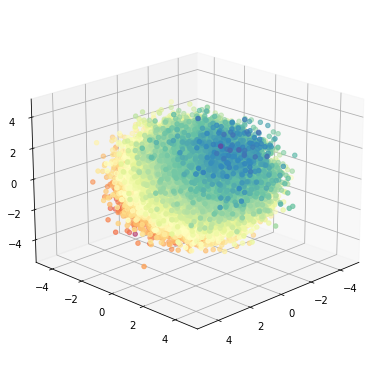

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.999977062985714


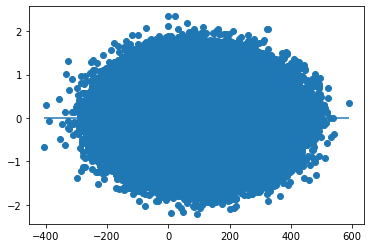

In [48]:
 predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()